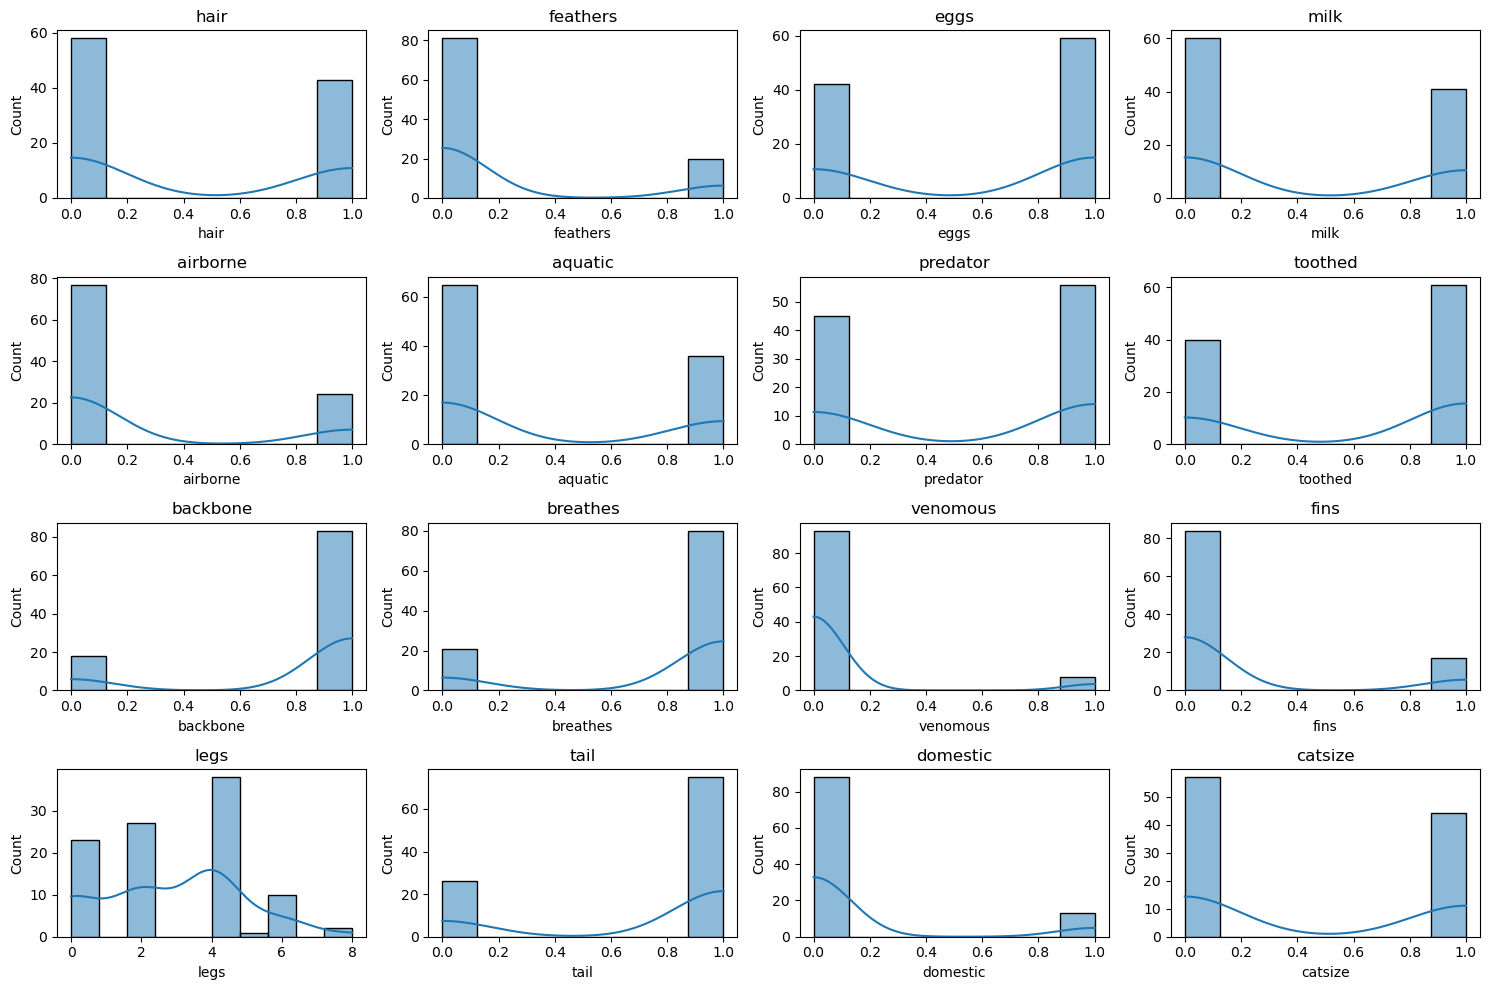

In [1]:
#Analyze the Data Using Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\user\\AppData\\Local\\Temp\\f963586a-5c54-4c52-bcfa-7d205471c84e_KNN.zip.84e\\KNN\\Zoo.csv"
df = pd.read_csv(file_path)

# Visualize the distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:-1], 1):  # Exclude 'animal name' and 'type'
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

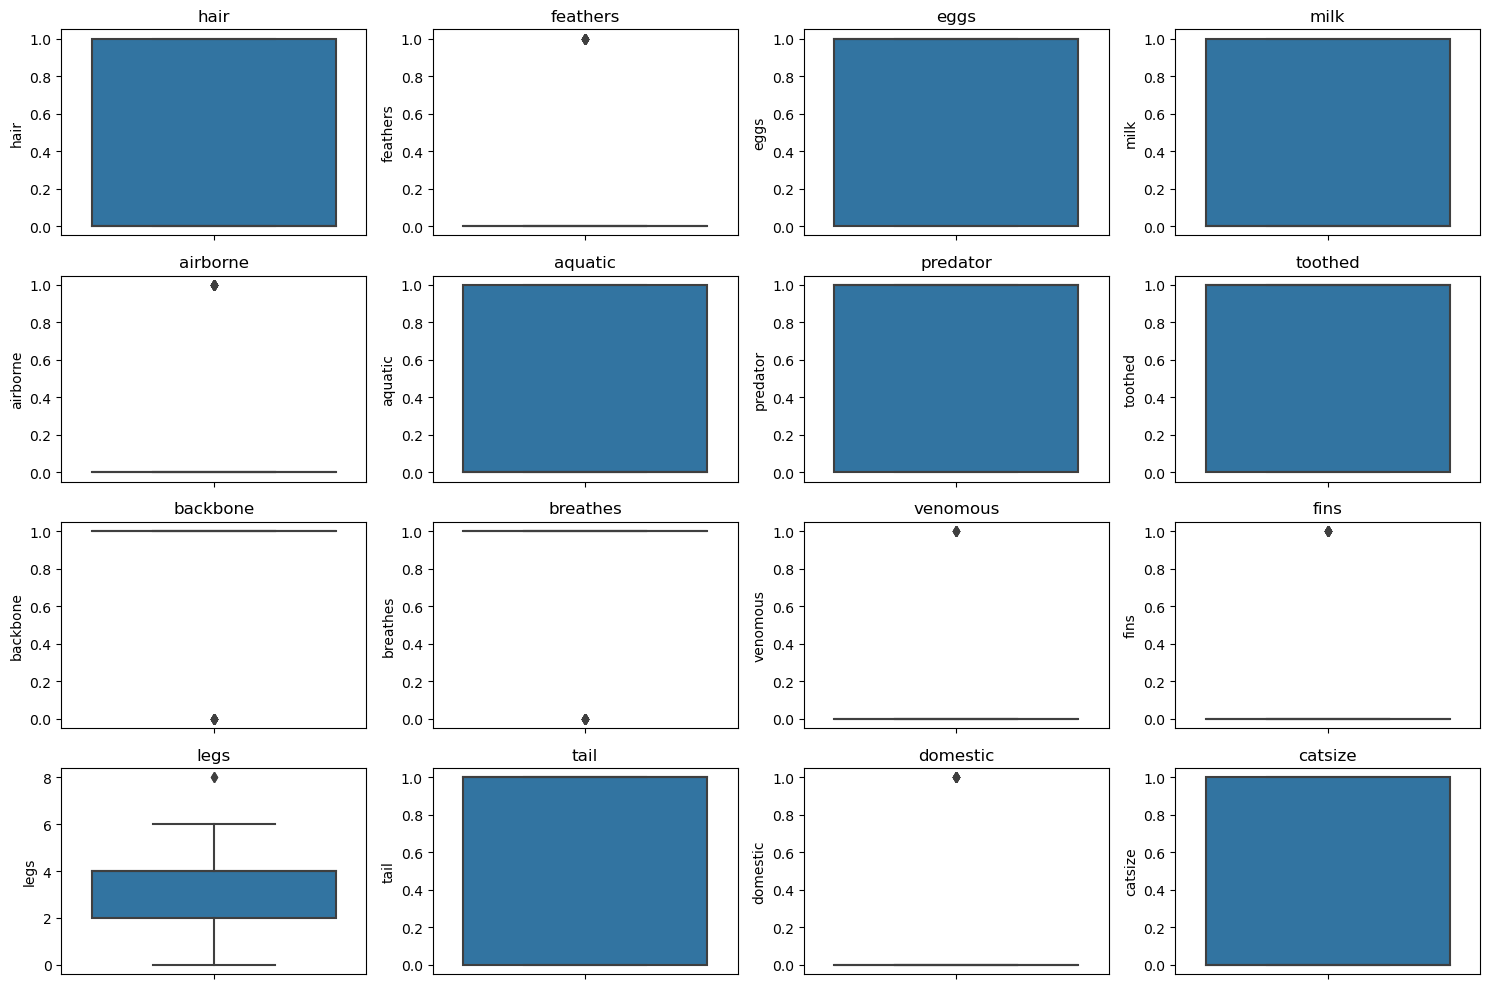

In [2]:
# Visualize feature distributions with boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:-1], 1):  # Exclude 'animal name' and 'type'
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

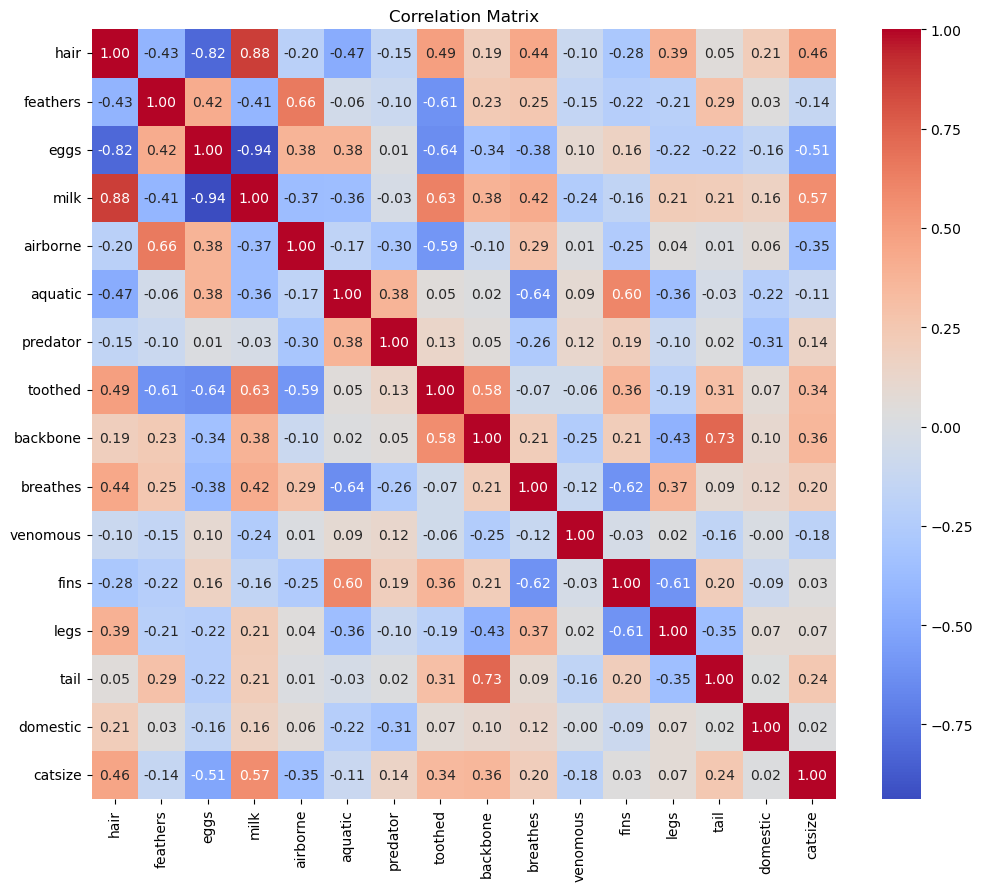

In [3]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('animal name', axis=1).drop('type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

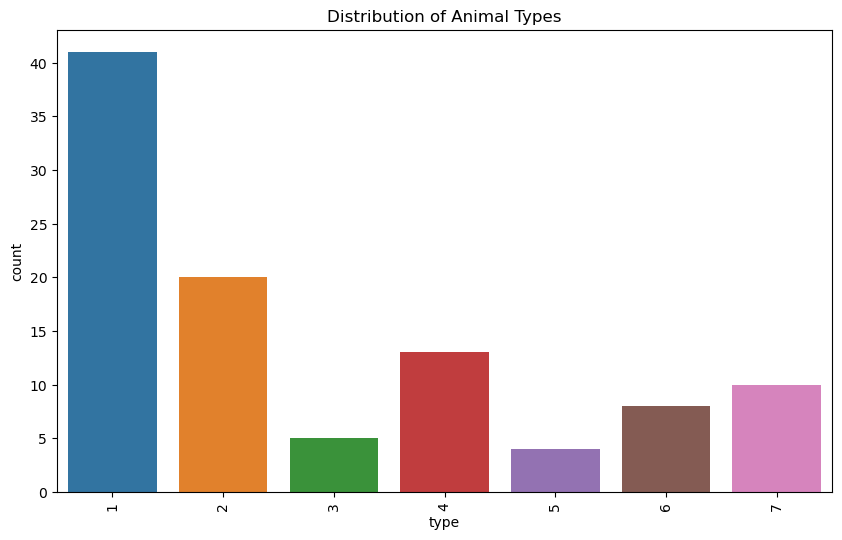

In [4]:
# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xticks(rotation=90)
plt.show()


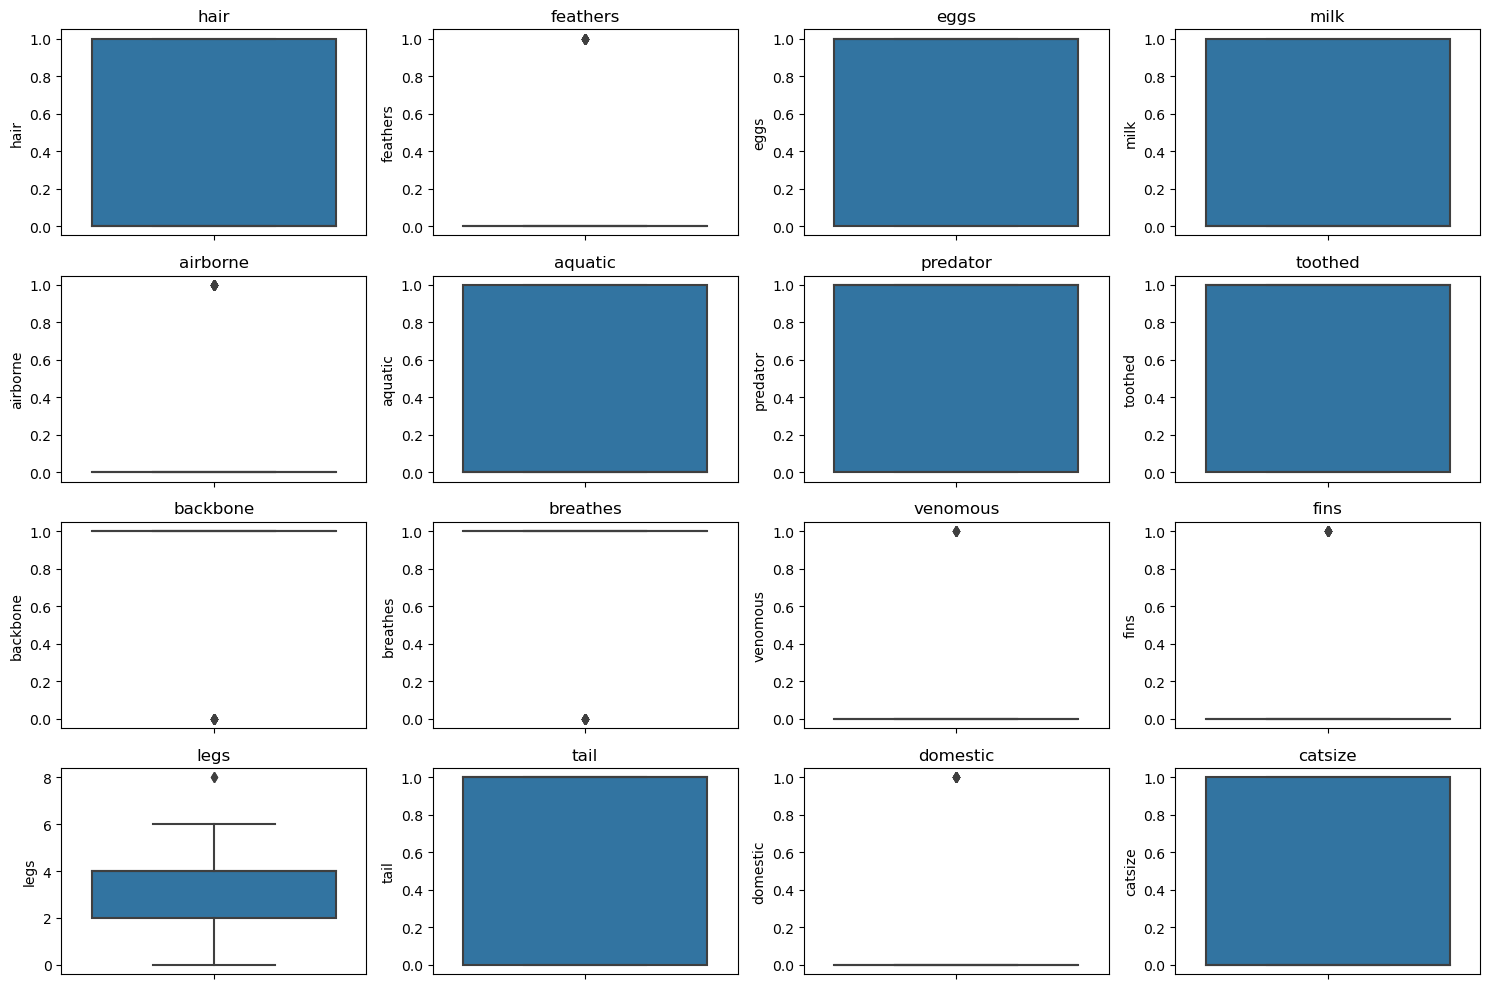

In [5]:
#Preprocess the Data
# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:-1], 1):  # Exclude 'animal name' and 'type'
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [6]:
#Split the Dataset
from sklearn.model_selection import train_test_split

# Prepare the data
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)


In [7]:
#Implement the K-Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # Choose an appropriate value for k
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [8]:
#Choose an Appropriate Distance Metric and Value for K
# Example: Trying different values for k
from sklearn.metrics import accuracy_score

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'k={k}, Accuracy={accuracy:.2f}')

k=1, Accuracy=1.00
k=2, Accuracy=1.00
k=3, Accuracy=1.00
k=4, Accuracy=1.00
k=5, Accuracy=1.00
k=6, Accuracy=0.90
k=7, Accuracy=1.00
k=8, Accuracy=1.00
k=9, Accuracy=0.90
k=10, Accuracy=0.90
k=11, Accuracy=0.90
k=12, Accuracy=0.90
k=13, Accuracy=0.95
k=14, Accuracy=0.95
k=15, Accuracy=0.95
k=16, Accuracy=0.90
k=17, Accuracy=0.90
k=18, Accuracy=0.90
k=19, Accuracy=0.90
k=20, Accuracy=0.90


In [9]:
# Evaluate the Classifier’s Performance
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2

    accuracy                           0.90        21
   macro avg       0.64      0.71      0.67        21
weighted avg       0.83      0.90      0.86        21



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


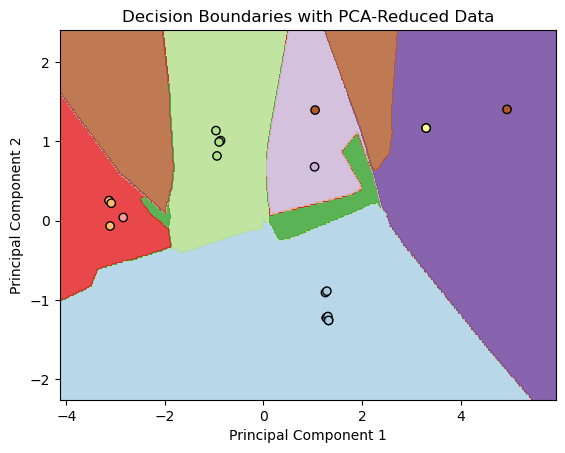

In [10]:
# Visualize the Decision Boundaries
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Train KNN with PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.get_cmap('Paired'))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.get_cmap('Paired'))
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_boundaries(X_test_pca, y_test_pca, knn_pca, 'Decision Boundaries with PCA-Reduced Data')

In [ ]:
Interview Questions
===================
1.What are the key hyperparameters in KNN (K-Nearest Neighbors)?
Key Hyperparameters in KNN:

k: Number of neighbors to consider.
weights: How neighbors are weighted (uniform or distance).
algorithm: Method for computing neighbors (brute, kd_tree, ball_tree).
p: Parameter for distance metric (1 for Manhattan, 2 for Euclidean).
leaf_size: Size of leaf nodes in tree-based algorithms.
    
2. What distance metrics can be used in KNN? 
Distance Metrics in KNN:

Euclidean: Square root of squared differences.
Manhattan: Sum of absolute differences.
Minkowski: Generalization of Euclidean and Manhattan (parameterized by p).
Chebyshev: Maximum absolute difference.
Hamming: Number of differing categorical features.
Cosine Similarity: Cosine of the angle between vectors.
Mahalanobis: Accounts for correlations between variables.
